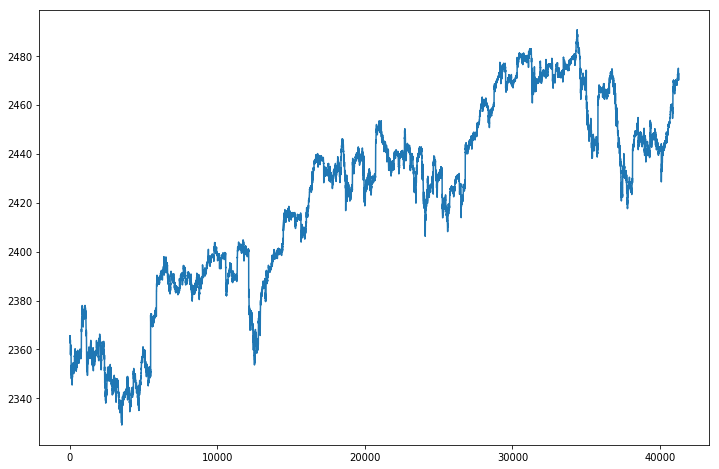

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

"""DATA IMPORT AND SETUP"""
data = pd.read_csv('data_stocks.csv')
SP500 = data['SP500']
plt.figure(figsize=(12,8))
plt.plot(SP500)

Stock_Input_orig = []
for i in range(len(SP500)-65):
    Stock_Input_orig.append(SP500[i:i+60])
Stock_Input = np.array(Stock_Input_orig)
X = Stock_Input
X = (X - (np.amin(X)))/(np.amax(X) - np.amin(X))

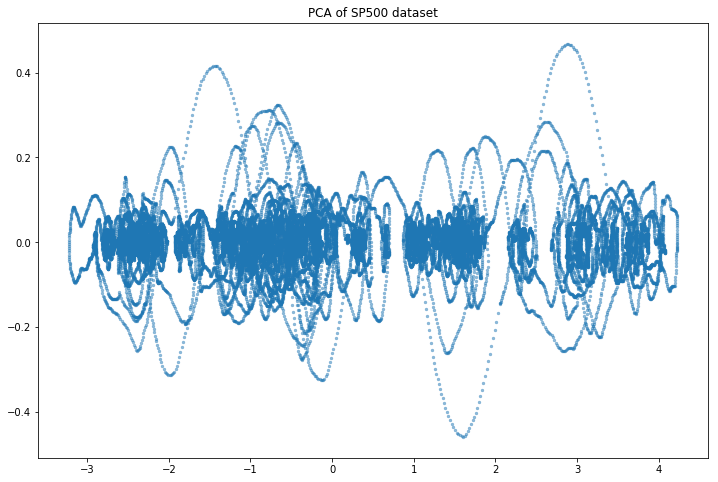

In [81]:
from sklearn.decomposition import PCA

"""PCA PRINCIPAL COMPONENT ANALYSIS"""
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:, 1], marker='.', lw=0.3, alpha=0.5)
plt.title('PCA of SP500 dataset')
plt.show()

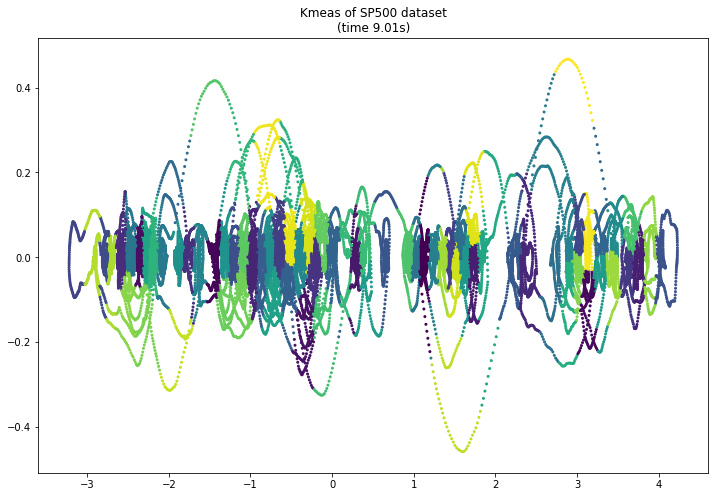

In [82]:
from sklearn.cluster import KMeans

"""K_MEANS CLUSTER"""
t0 = time.time()
y_pred = KMeans(n_clusters=80).fit_predict(X_pca)
elapsed_time = time.time() - t0

plt.figure(figsize=(12,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, marker='.', lw=0)
plt.title('Kmeas of SP500 dataset\n(time %.2fs)' % (elapsed_time))
plt.show()

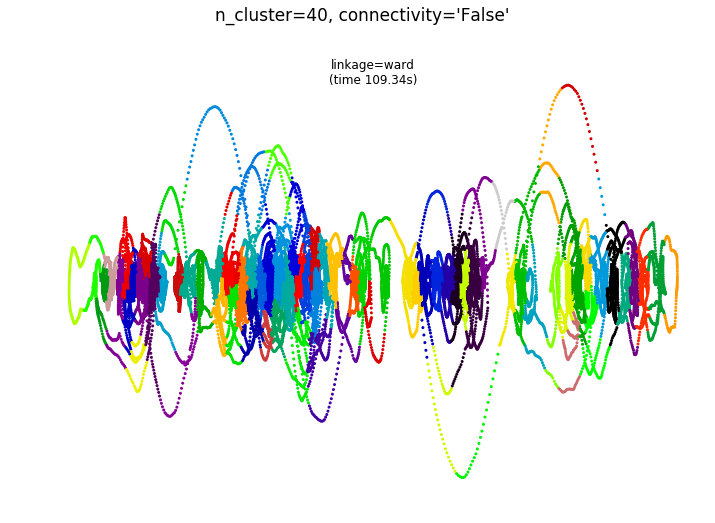

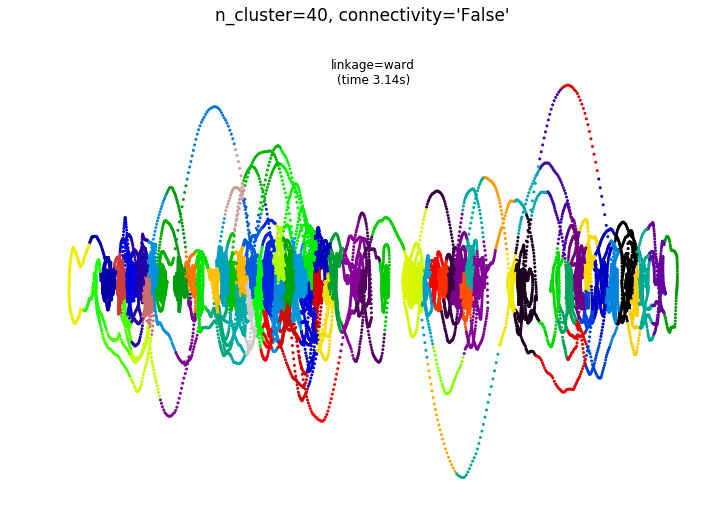

In [83]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

"""AGGLOMERATIVE CLUSTERING"""
knn_graph = kneighbors_graph(X_pca, 5, include_self=False)

model = AgglomerativeClustering(linkage='ward', connectivity=None, n_clusters=80)
t0 = time.time()
model.fit(X_pca)

elapsed_time = time.time() - t0

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral, marker='.', lw=0)
plt.title('linkage=%s\n(time %.2fs)' % ('ward', elapsed_time), fontdict=dict(verticalalignment='top'))
plt.axis('off')
plt.suptitle('n_cluster=%i, connectivity=%r' % (40, 'False'), size=17)

plt.show()

""""""
model = AgglomerativeClustering(linkage='ward', connectivity=knn_graph, n_clusters=80)
t0 = time.time()
model.fit(X_pca)

elapsed_time = time.time() - t0

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral, marker='.', lw=0)
plt.title('linkage=%s\n(time %.2fs)' % ('ward', elapsed_time), fontdict=dict(verticalalignment='top'))
plt.axis('off')
plt.suptitle('n_cluster=%i, connectivity=%r' % (40, 'False'), size=17)

plt.show()

In [84]:
"""SEPARATE THE STOCKS SET INTO GROUPS OF INCREASING OR DECREASING"""
for i in range(len(np.unique(model.labels_))):
    indexx = np.where(model.labels_==i)
    for j in range(len(indexx[0])):
        if X[indexx[0][j]-1][59] > X[indexx[0][j]][4]:
            model.labels_[j] = i+80

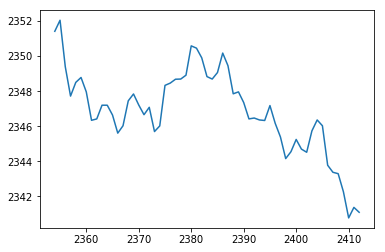

In [108]:
indexxx = np.where(model.labels_==0)
plt.plot(SP500[indexxx[0][10]:indexxx[0][10]+59])

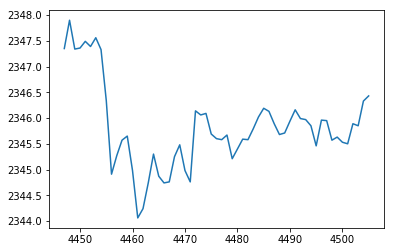

In [110]:
plt.plot(SP500[indexxx[0][540]:indexxx[0][540]+59])

In [103]:
unique, counts = np.unique(model.labels_, return_counts=True)
print(len(model.labels_), "\n")
print(dict(zip(unique, counts)))
print("\nThe index from 0 to 79 are representatives of 80 different types of stock of which price will increase;")
print("In contrast the index from 80 to 179 are representatives of 80 different types of stock of which price will decrease.")

41201 

{0: 710, 1: 583, 2: 733, 3: 744, 4: 329, 5: 1370, 6: 118, 7: 897, 8: 1047, 9: 401, 10: 74, 11: 1571, 12: 1259, 13: 514, 14: 241, 15: 480, 16: 1175, 17: 1780, 18: 76, 19: 1018, 20: 35, 21: 517, 22: 558, 23: 846, 24: 1236, 25: 898, 26: 829, 27: 41, 28: 497, 29: 421, 30: 594, 31: 27, 32: 236, 33: 371, 34: 478, 35: 650, 36: 85, 37: 1139, 38: 641, 39: 97, 40: 623, 41: 310, 42: 54, 43: 218, 44: 339, 45: 604, 46: 132, 47: 1030, 48: 262, 49: 185, 50: 35, 51: 456, 52: 108, 53: 1096, 54: 463, 55: 126, 56: 108, 57: 236, 58: 103, 59: 315, 60: 465, 61: 1072, 62: 22, 63: 58, 64: 348, 65: 739, 66: 673, 67: 29, 68: 393, 69: 146, 70: 72, 71: 24, 73: 936, 74: 104, 75: 279, 76: 1104, 77: 496, 78: 51, 79: 348, 85: 23, 91: 98, 92: 9, 96: 8, 97: 424, 104: 43, 117: 19, 125: 1, 127: 12, 133: 8, 139: 1, 141: 147, 144: 7, 145: 31, 146: 17, 148: 44, 153: 165, 156: 516, 157: 78, 158: 47, 159: 25}

The index from 0 to 79 are representatives of 80 different types of stock of which price will increase;
In co

In [86]:
"""SETUP DESIRED OUTPUT PATTERN"""
ModelType = model.labels_
N = len(ModelType)
DesOut = np.zeros((N, 160))
for i in range(N):
    y = np.zeros((1,160))
    y[0][ModelType[i]] = 1
    DesOut[i] = y[0]
    
"""SETUP INPUT PATTERN"""
InPat = X

In [90]:
"""ALGORITHM SETUP"""
"""RULE SETUP"""
a = 0.1   ###set the learning rate
tol = 100
nIts = 100000     ###set the maximum number of allowed iterations
nPat,nIn = InPat.shape
nPat,nOut = DesOut.shape
V = np.random.rand(nOut, nIn)*2 - 1   ###set initially random connectivity matrix
maxErr=10

In [91]:
from random import *
import math

t0 = time.time()
"""TRAINING CONNECTIVITY MATRIX"""
for i in range(nIts):
    pIndx = math.ceil(uniform(0,1)*nPat)    #choose pattern pair at random
    d = np.array([DesOut[pIndx-1]]).T       #set desired output d to chosen output
    x = np.array([InPat[pIndx-1]]).T        #set input x to chosen input pattern
    q = np.dot(V, x)                        #find the weighted sum q of the inputs
    y = 1/(1+np.power(math.e, -q))          #squash that to compute the output y
    dy = np.multiply(y, (1-y))              #compute the derivative of the squashing function
    e = d - y                               #find the error e for the chosen input
    g = np.multiply(e, dy)                  #find output error signal g
    deltaV = a*np.dot(g, x.T)               #compute delta rule weight update
    V = V + deltaV                          #apply the weight update
    if i%10 == 0:                           #after several updates check maximum error
        Q = (np.dot(V, InPat.T)).T          #compute the weighted input sum for all patterns
        Out = 1/(1+np.power(math.e, -Q))    #squash to compute output for all patterns
        maxErr=sum(sum(abs(DesOut - Out)))  #find max error over all patterns end % end the check
    if maxErr < tol:                        #break if max error is below tolerance end % end learning loop
        break

elapsed_time = time.time() - t0
print("Time Uses for Training: ", elapsed_time, "seconds")

Time Uses for Training:  2806.1482100486755


In [96]:
"""CALCULATE THE ACCURACY"""

dd = []
for k in range(len(Out)):
    maxx_d = max(Out[k])
    for i, j in enumerate(Out[k]):
        if j == maxx_d:
            dd.append(i)
            
cc = []
for l in range(len(DesOut)):
    maxx_c = max(DesOut[l])
    for i, j in enumerate(DesOut[l]):
        if j == maxx_c:
            cc.append(i)

NN = len(DesOut)
calc = 0
for i in range(NN):
    if (dd[i] > 79) & (cc[i] > 79):
        calc = calc + 1
    if (dd[i] < 80) & (cc[i] < 80):
        calc = calc + 1

accuracy = '{:.3%}'.format(calc/NN)
print(accuracy)

95.818%
